In [7]:
%matplotlib inline

import os
import pandas as pd
from miran import *
import seaborn as sns
import re
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec

# import and tweak Pandas display options:
pd.set_option('precision', 2)
pd.set_option('display.colheader_justify', 'right')
pd.set_option('display.width', 40)
pd.set_option('display.max_rows', 100)
pd.set_option('max_colwidth', 50)
pd.set_option('expand_frame_repr', True)

sns.set_palette("Reds_d", 2); my_palette='Reds'; libcolor='Reds'
sns.set_style('whitegrid', {'axes.linewidth': 0.2,  'axes.edgecolor': 'gray', 'axes.facecolor':'snow'})
mpl.rc('font', **{'family':'serif', 'serif':['Times']})
mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)
mpl.rc('axes', labelsize=9)
mpl.rc('text', usetex=True)

In [8]:
# annotaciones detalladas en excel
d = pd.read_excel('/Users/angel/Insync/Datasets/giantsteps/GiantSteps.xlsx')
d = d.filter(['id', 'genres', 'subgenres', 'key_beatport', 'key1'])

In [9]:
gen = [(11,69,'Tech House'),
       (18,61,'Progressive House'),
       (3,73,'Deep House'),
       (7,51,'Trance'),
       (5,45,'Electro House'),
       (8,35,'House'),
       (7,31,'Drum & Bass'),
       (5,28,'Techno'),
       (8,22,'Electronica / Downtempo'),
       (2,20,'Dubstep'),
       (3,11,'Breaks'),
       (3,10,'Indie Dance / Nu Disco'),
       (0,12,'Minimal / Deep Tech'),
       (3,8,'Big Room'),
       (1,5,'Glitch Hop'),
       (0,5,'Psy-Trance'),
       (0,4,'Hard Dance'),
       (0,4,'Hip-Hop / R&B'),
       (0,3,'Funk / Soul / Disco'),
       (0,3,'Future House'),
       (1,2,'Reggae / Dancehall / Dub'),
       (2,1,'Dance'),
       (1,2,'Hardcore / Hard Techno'),
       (1,2,'DJ Tools'),
       (2,1,'Pop Rock'),
       (0,1,"Funky / Groove / Jackin' House")]

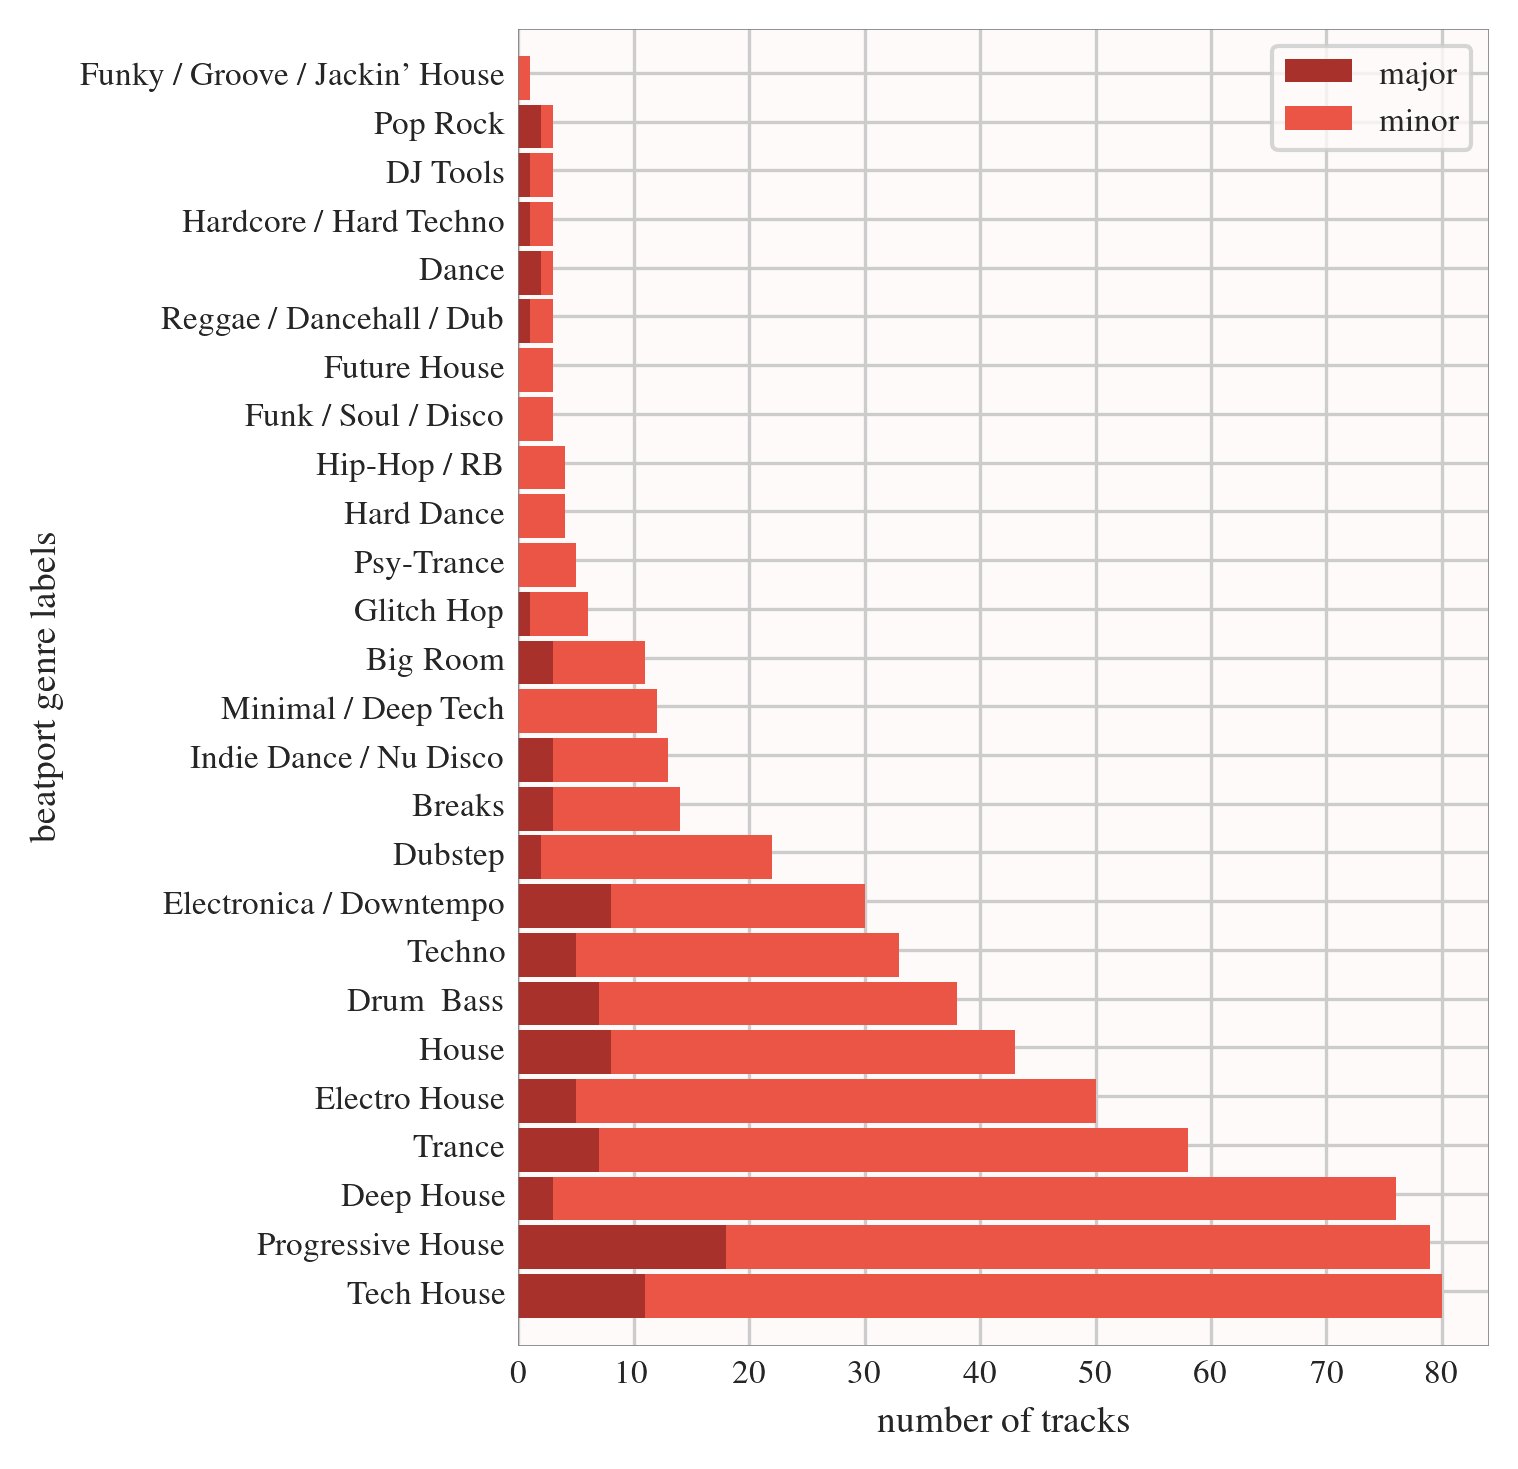

In [11]:
name="gsgenres" 
output_dir="/Users/angel/Dropbox/Apps/Texpad/Thesis/figures/"
    
major = np.array(np.column_stack(gen)[0].astype(np.int))
minor = np.array(np.column_stack(gen)[1].astype(np.int))
    
total_maj = 91
total_min = 509
total_items = total_maj + total_min
percentage_factor = 100.00 / total_items
percentage_major = np.multiply(major, percentage_factor)
percentage_minor = np.multiply(minor, percentage_factor)

# NOW THE PLOTTING
plt.figure(figsize=(5.16, 5), dpi=150)

plt.ylabel('beatport genre labels')
plt.ylim((-1, 26))
plt.xlabel('number of tracks')
plt.yticks(np.add(range(len(gen)), 0.1), np.column_stack(gen)[2].astype(str))
plt.barh(range(len(gen)), major, height=0.9, label='major', linewidth=0, edgecolor=(.1, .1, .1))
plt.barh(range(len(gen)), minor, height=0.9, left=major, label='minor', linewidth=0, edgecolor=(.1, .1, .1))
plt.legend(fontsize=8, frameon=True)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, re.sub(' ', '_', name) + '.pdf'), format="pdf", dpi=1200)
